In [4]:
import data_read

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "epidermal")

save_inflection_point = []
for derm_scan in subject_data.visit.epidermal:

    derm_scan.get_normalize_a_scan()
    # Try approach 1 
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15,200)

    save_inflection_point.append(derm_scan.depth_data["Depth"][derm_scan.min_location_index]) 

    derm_scan.plot_a_scan(subject_data.subject_id)

    print(save_inflection_point)

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
[0.0725333]
[0.0725333, 0.0770667]
[0.0725333, 0.0770667, 0.0725333]
[0.0725333, 0.0770667, 0.0725333, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068, 0.0770667, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068, 0.0770667, 0.0770667, 0.0725333]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068, 0.0770667, 0.0770667, 0.0725333, 0.0770667]
[0.0725333, 0.0770667, 0.0725333, 0.0770667, 0.0816, 0.0770667, 0.0770667, 0.068, 0.0770667, 0.077

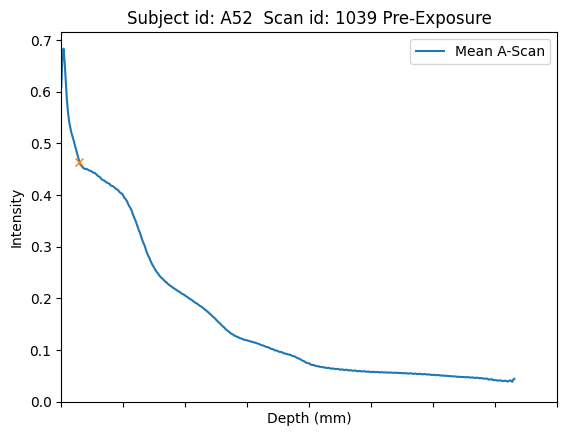

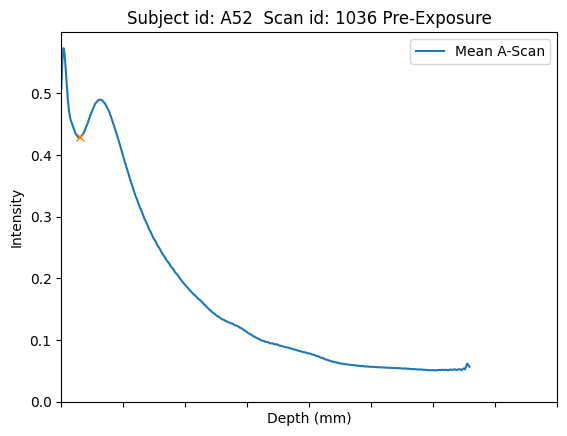

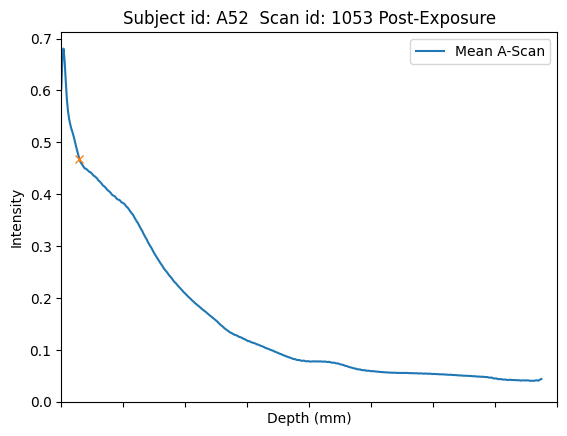

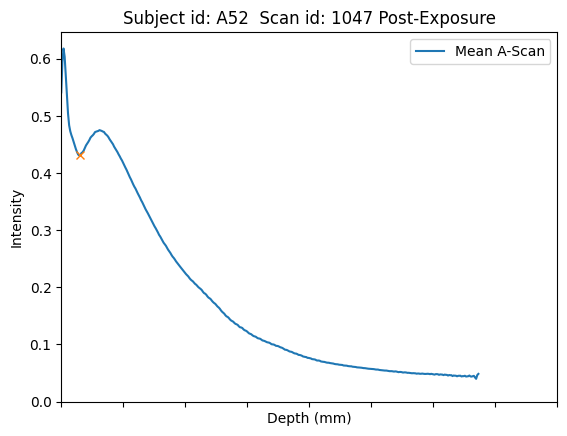

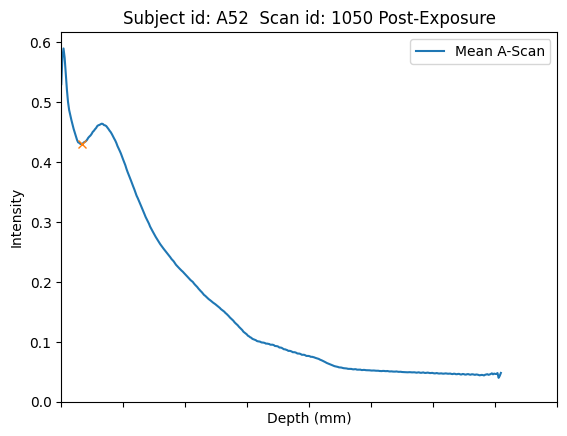

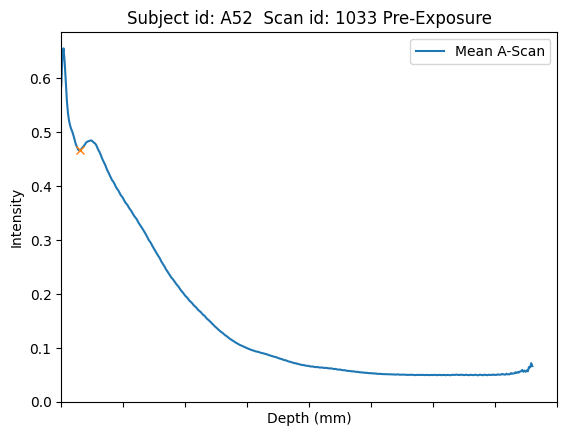

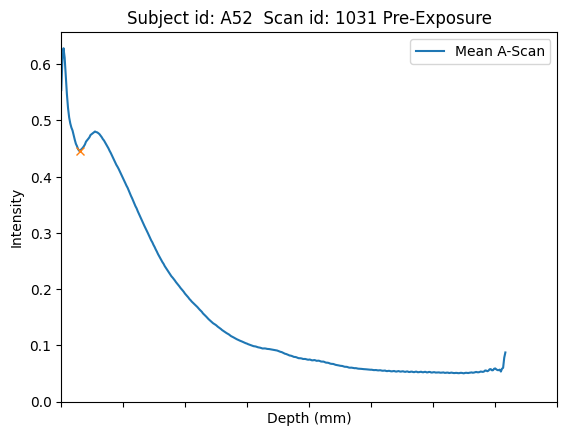

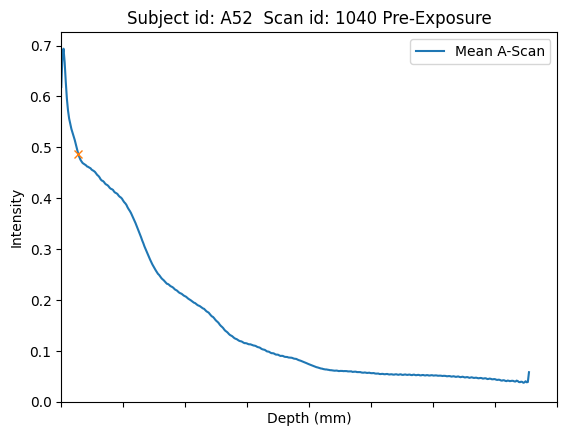

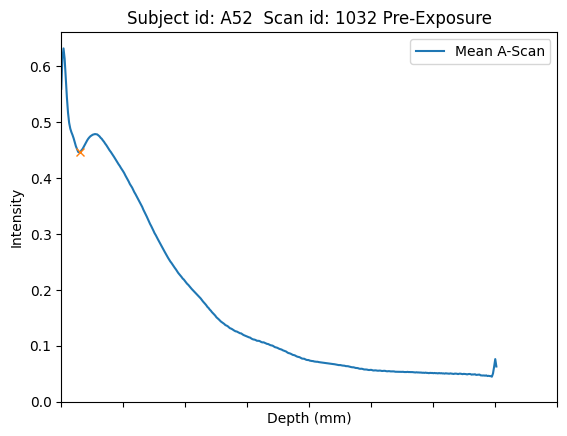

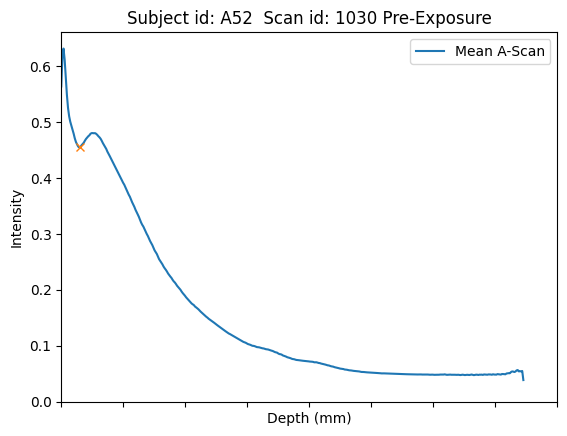

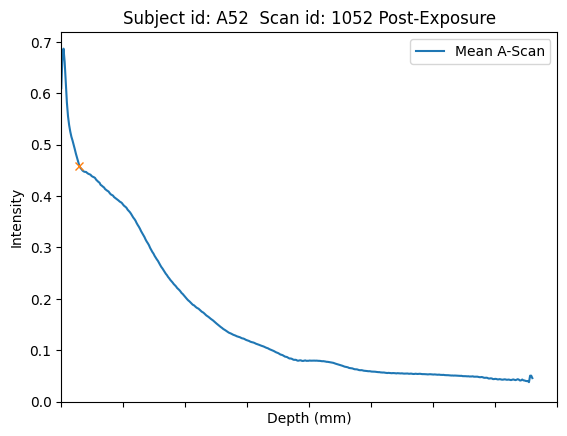

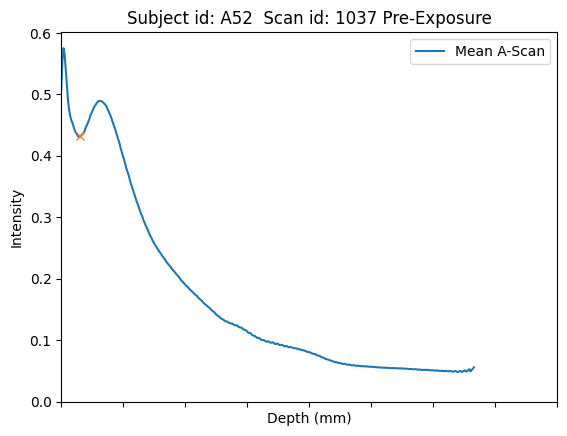

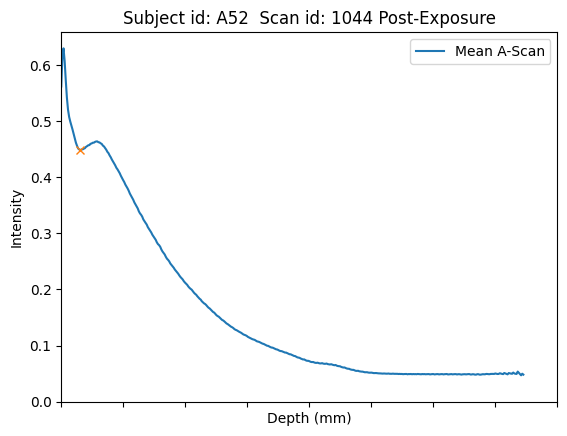

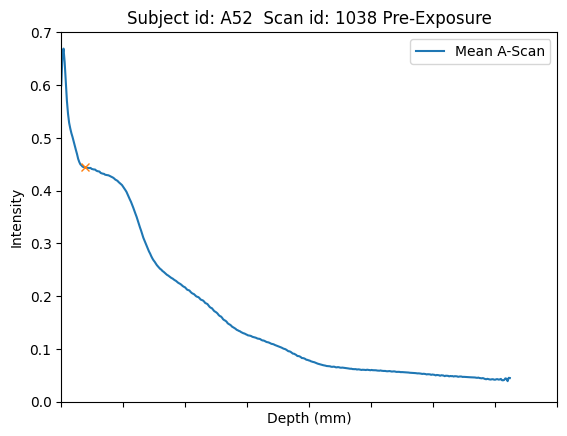

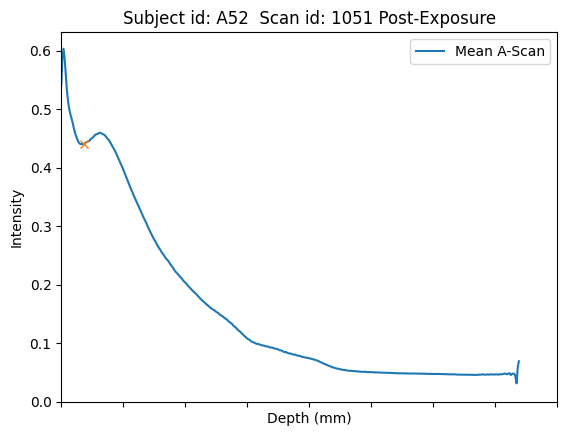

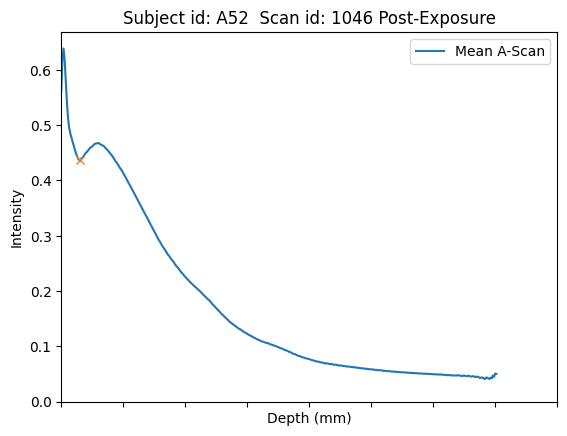

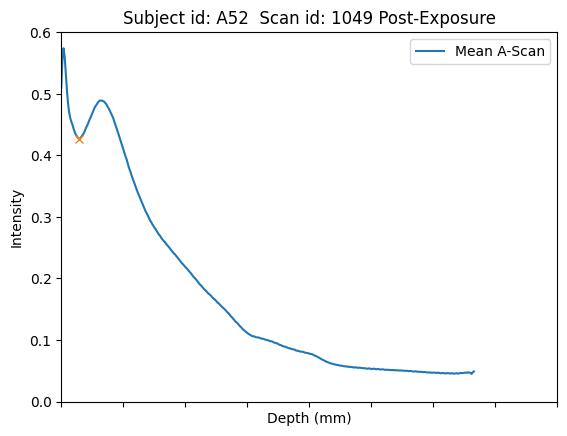

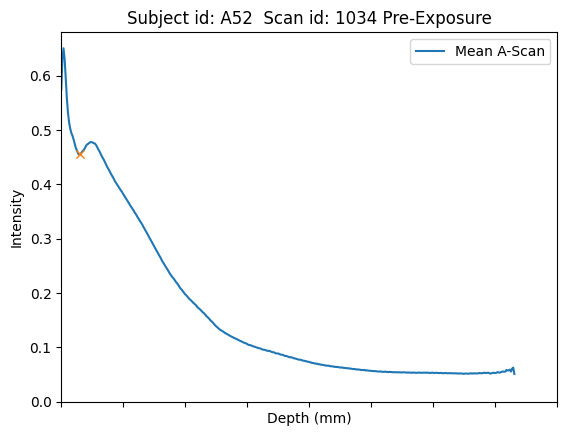

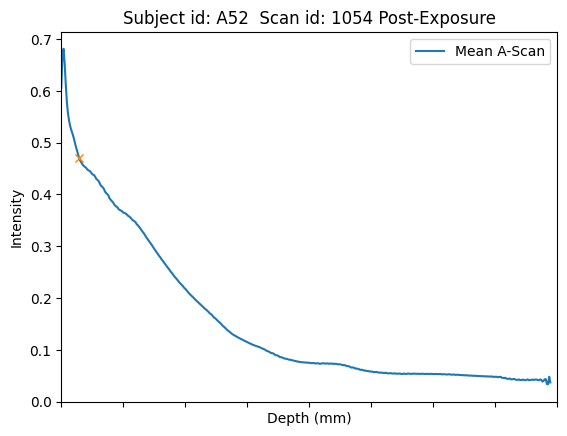

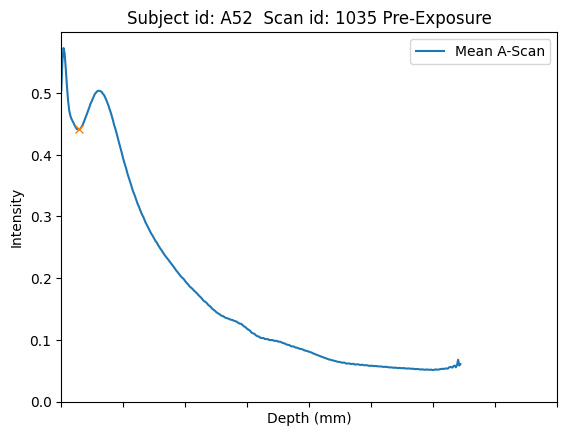

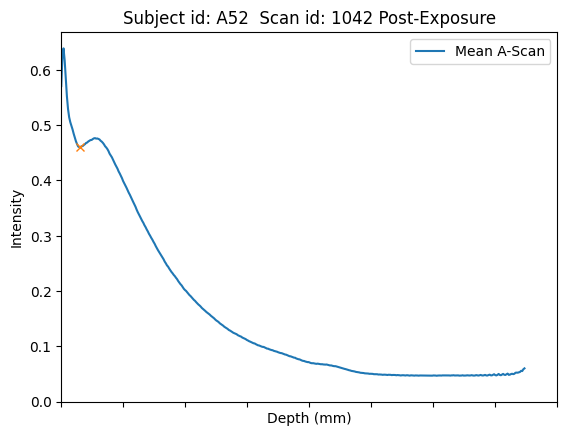

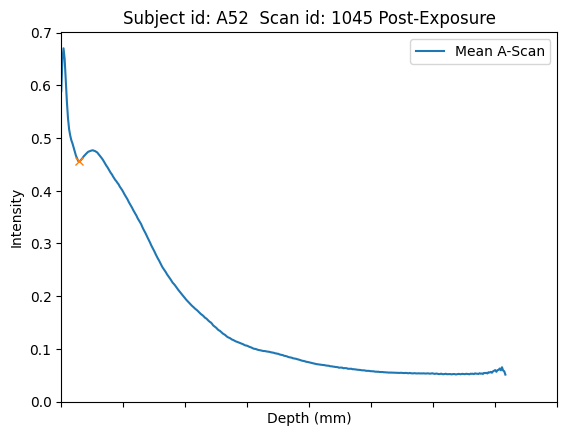

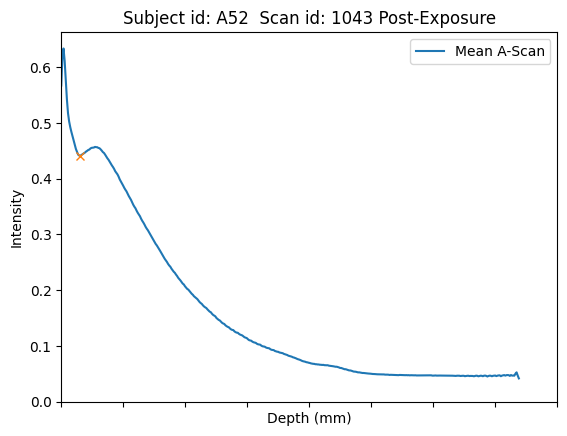

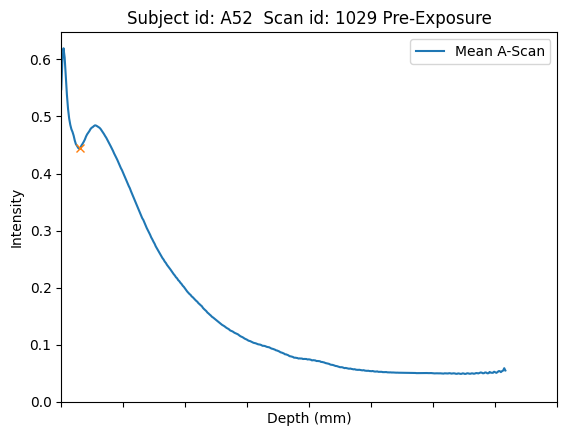

Approach 1 - Mean: 17.2, Median: 17.0
Approach 2 - Mean: 15.75, Median: 16.0


In [ ]:
import numpy as np

# Lists to store the min_location_index values for both approaches
approach_1_indices = []
approach_2_indices = []

# Loop through each epidermal scan
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()

    # Approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is not None:
        approach_1_indices.append(derm_scan.min_location_index)

    # Approach 2 (only if approach 1 doesn't find a valid index)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)
        if derm_scan.min_location_index is not None:
            approach_2_indices.append(derm_scan.min_location_index)

    # Optionally: Plot the A-scan for visualization
    derm_scan.plot_a_scan(subject_data.subject_id)

# Calculate the mean and median for both approaches
mean_approach_1 = np.mean(approach_1_indices) if approach_1_indices else None
median_approach_1 = np.median(approach_1_indices) if approach_1_indices else None

mean_approach_2 = np.mean(approach_2_indices) if approach_2_indices else None
median_approach_2 = np.median(approach_2_indices) if approach_2_indices else None

# Print the results
print(f"Approach 1 - Mean: {mean_approach_1}, Median: {median_approach_1}")
print(f"Approach 2 - Mean: {mean_approach_2}, Median: {median_approach_2}")


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None


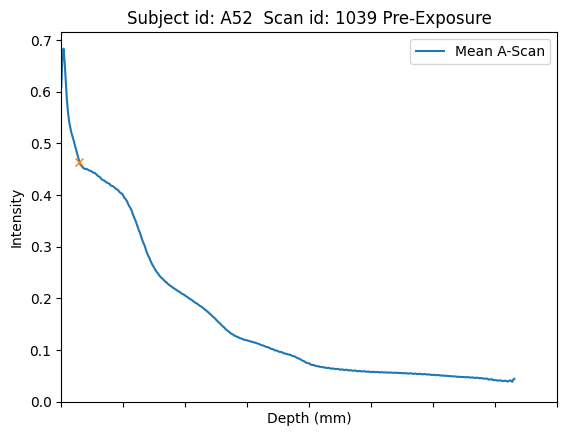

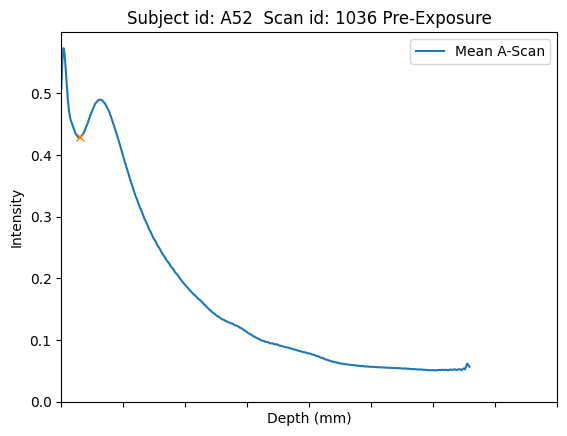

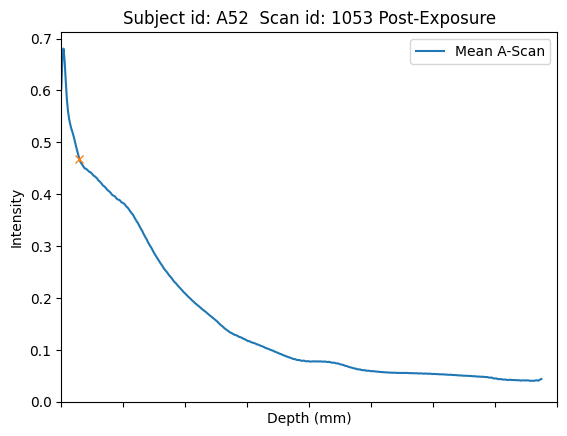

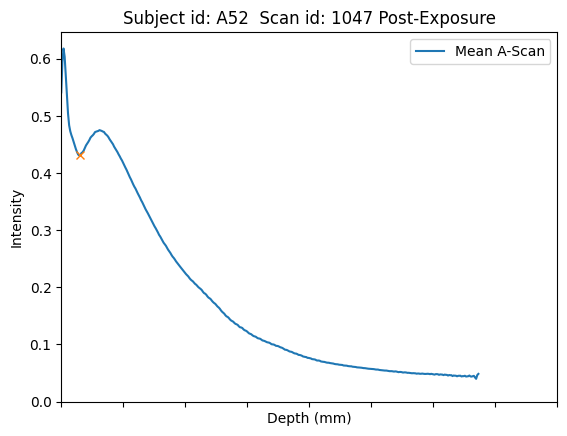

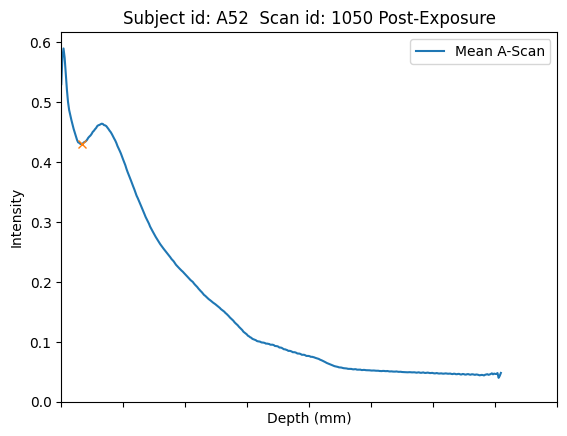

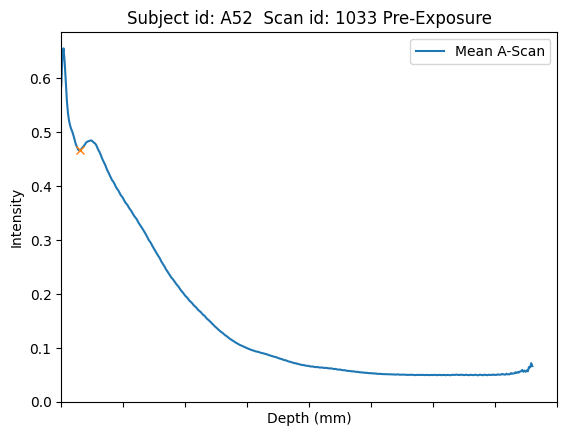

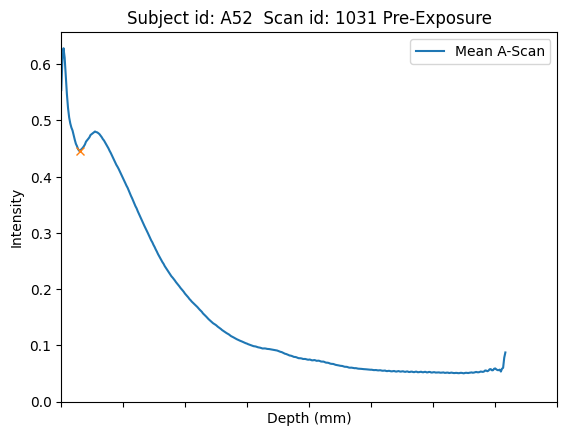

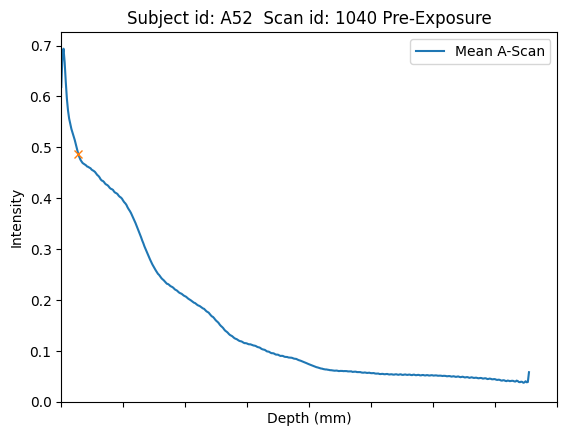

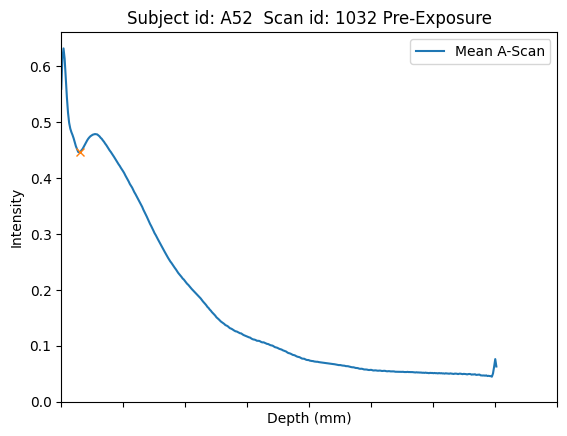

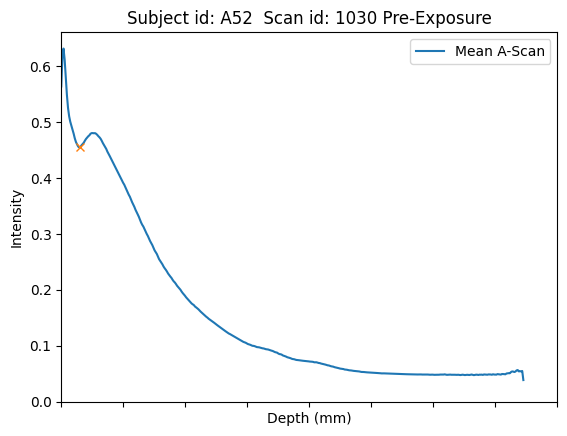

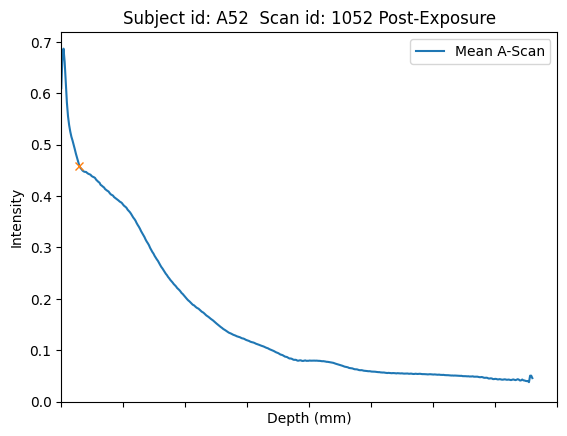

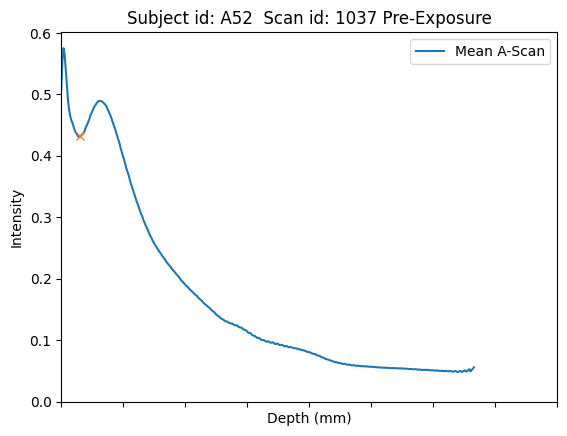

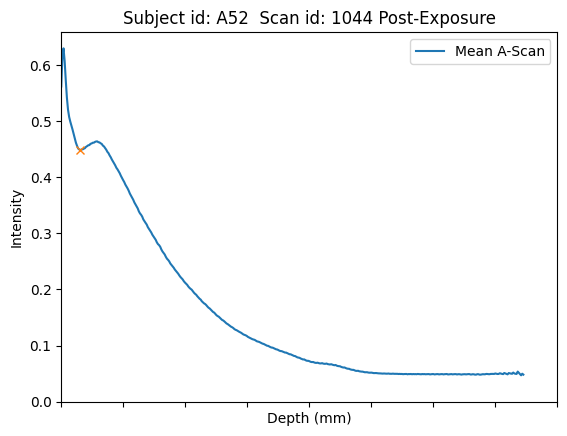

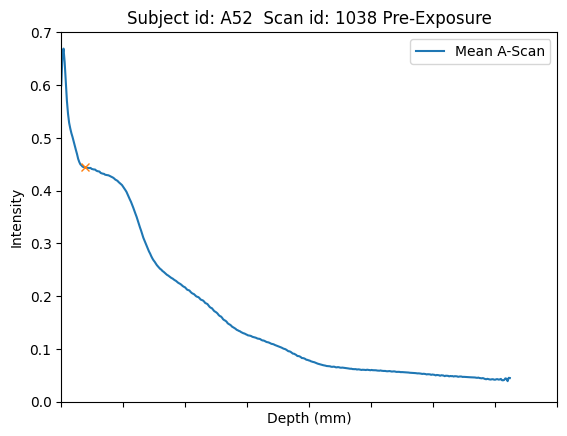

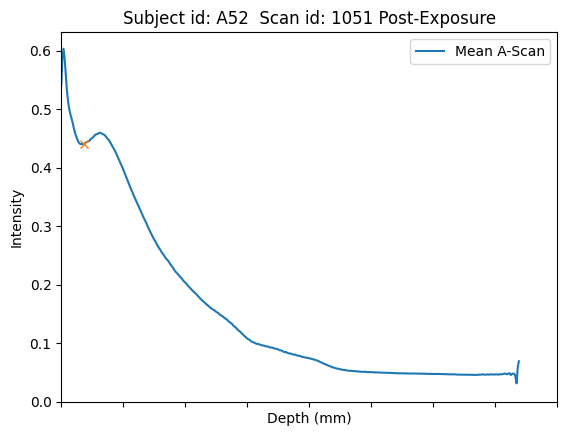

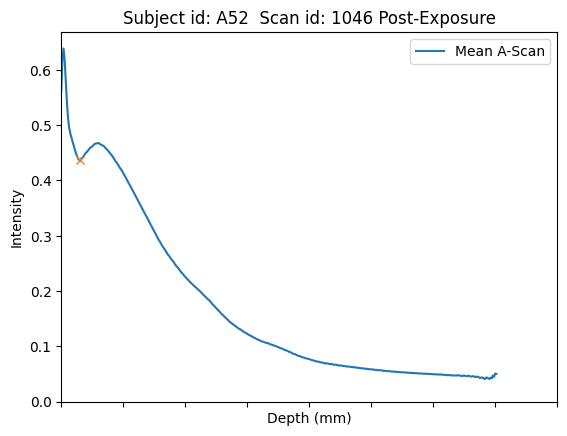

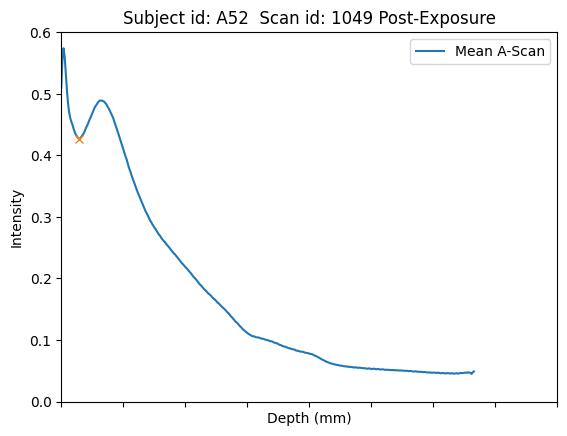

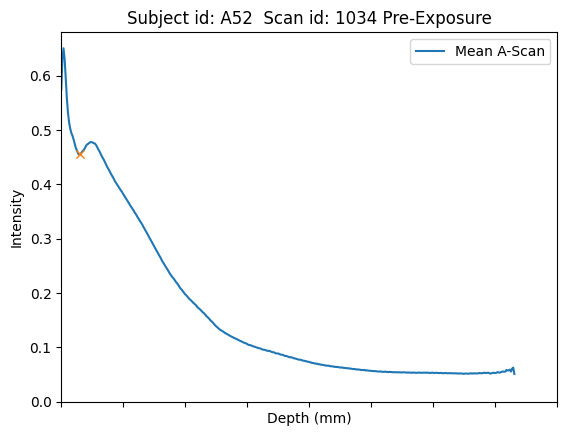

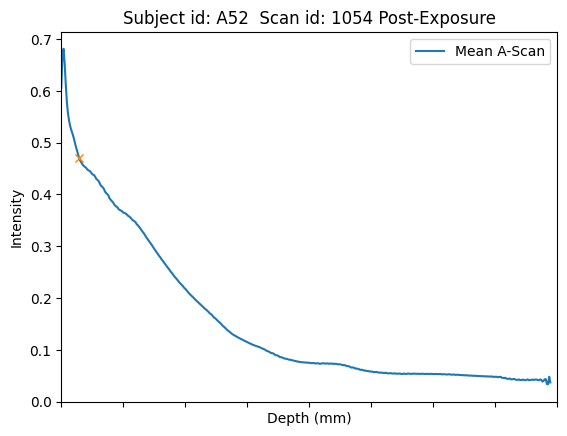

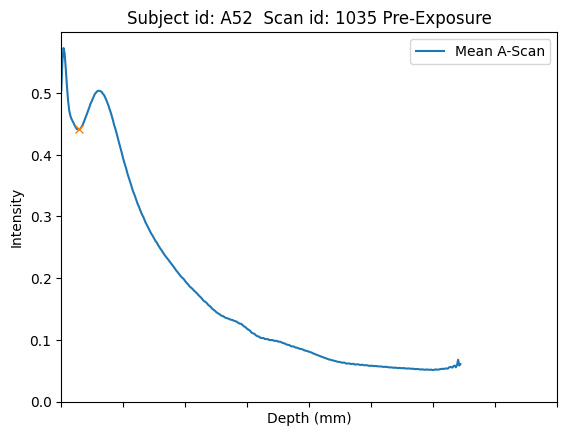

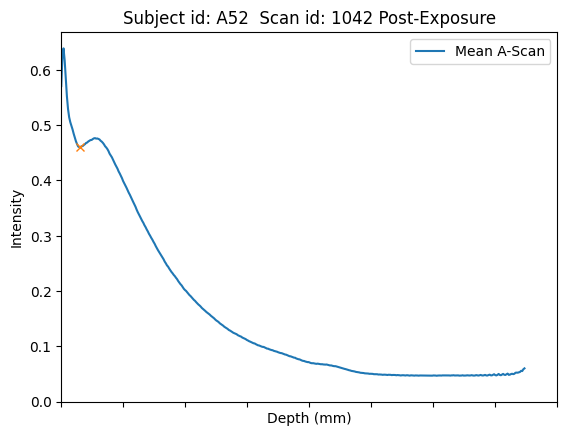

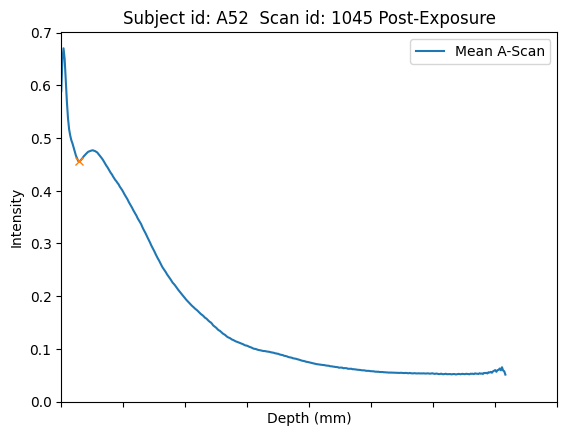

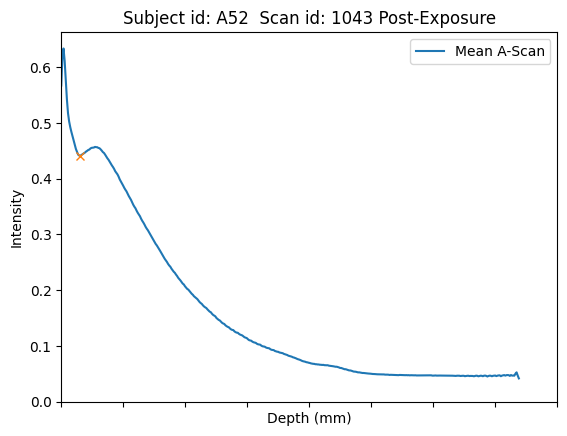

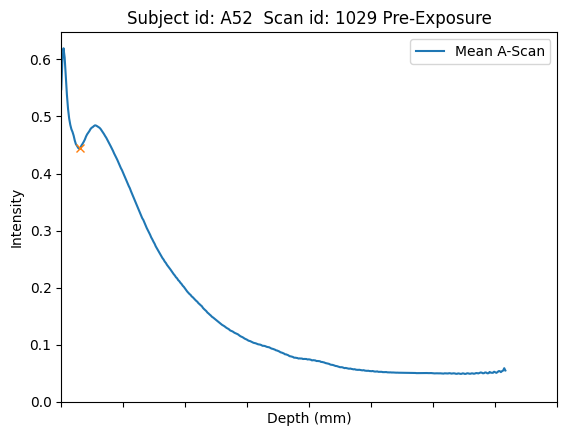

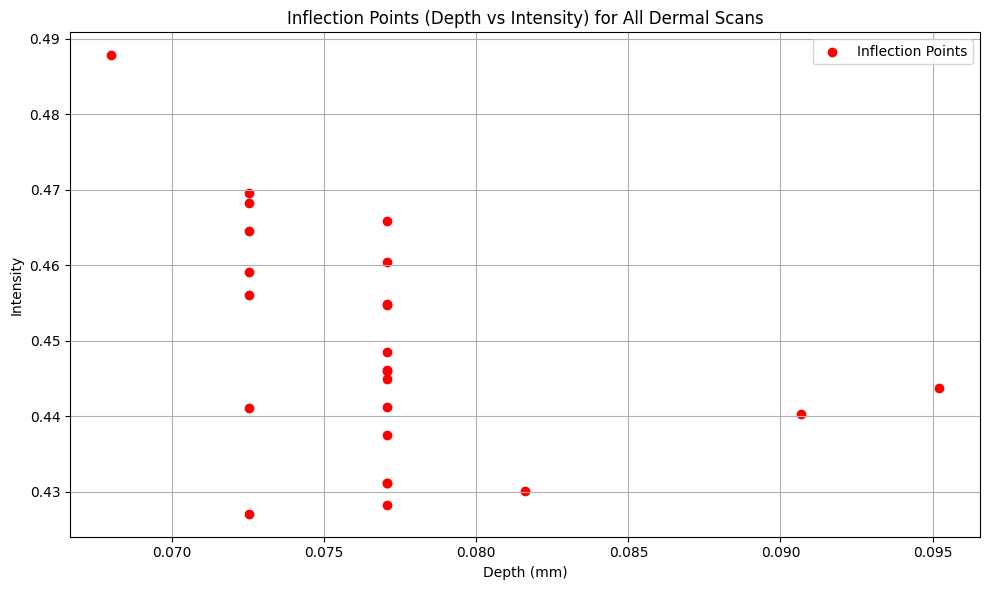

Inflection Points (Depth and Intensity):
[(0.0725333, 0.464559), (0.0770667, 0.428266), (0.0725333, 0.468275), (0.0770667, 0.431191), (0.0816, 0.430078), (0.0770667, 0.465847), (0.0770667, 0.446003), (0.068, 0.487838), (0.0770667, 0.446138), (0.0770667, 0.454736), (0.0725333, 0.459165), (0.0770667, 0.431177), (0.0770667, 0.448522), (0.0952, 0.443659), (0.0906667, 0.44032), (0.0770667, 0.437528), (0.0725333, 0.427045), (0.0770667, 0.454813), (0.0725333, 0.46954), (0.0725333, 0.441035), (0.0770667, 0.460459), (0.0725333, 0.456054), (0.0770667, 0.441192), (0.0770667, 0.44489)]


In [ ]:
import data_read
import matplotlib.pyplot as plt

# Initialize a list to store inflection points and corresponding intensities
save_inflection_point_depth = []
save_inflection_point_intensity = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Loop through each dermal scan and process the inflection points
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()
    
    # Try approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)

    # Save the inflection points (depths) and the corresponding intensity values
    inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
    inflection_intensity = derm_scan.depth_data["Mean A-scan"][derm_scan.min_location_index]
    
    save_inflection_point_depth.append(inflection_depth)
    save_inflection_point_intensity.append(inflection_intensity)

    # Plot the A-scan (optional)
    derm_scan.plot_a_scan(subject_data.subject_id)

# Plotting all inflection points on a single plot
plt.figure(figsize=(10, 6))

# Plot the inflection points (Depth vs Intensity)
plt.scatter(save_inflection_point_depth, save_inflection_point_intensity, color='red', label='Inflection Points')

# Set plot labels and title
plt.xlabel("Depth (mm)")
plt.ylabel("Intensity")
plt.title("Inflection Points (Depth vs Intensity) for All Dermal Scans")

# Add grid and legend
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the inflection points
print("Inflection Points (Depth and Intensity):")
print(list(zip(save_inflection_point_depth, save_inflection_point_intensity)))


In [ ]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize a list to store inflection point depths
save_inflection_point_depth = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# Loop through each dermal scan and process the inflection points
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()
    
    # Try approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)

    # Save the inflection points (depths)
    inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
    
    # Append the inflection points to the appropriate location
    location_dict[derm_scan.location].append(inflection_depth)

# Now, calculate the average inflection points per location
averaged_inflection_points = {
    loc: np.mean(points)
    for loc, points in location_dict.items() if len(points) > 0
}

# Now, let's prepare the data for plotting
depths_per_location = []
raw_depths = []

for loc, points in location_dict.items():
    depths_per_location


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None


find the quartile values and mean, median for SID and AUC and inflection points for each location across subjects for pre and post exposure. 

In [8]:
from scipy.stats import wilcoxon

# Initialize dictionaries for pre/post SID and AUC per location
sid_pre = {1: [], 2: [], 3: [], 4: []}
sid_post = {1: [], 2: [], 3: [], 4: []}
auc_pre = {1: [], 2: [], 3: [], 4: []}
auc_post = {1: [], 2: [], 3: [], 4: []}

# Updated data collection loop with pre/post separation
subject_ids = data_read.get_all_subject_ids("data/Vivosight_data/")

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, "data/Vivosight_data/", "data/scan_information/", "epidermal")
    
    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        if derm_scan.min_location_index is None:
            continue

        derm_scan.get_sid()
        derm_scan.get_AuC()

        loc = derm_scan.location
        if loc not in [1, 2, 3, 4]:
            continue

        if derm_scan.exposed:
            sid_post[loc].append(derm_scan.sid)
            auc_post[loc].append(derm_scan.AuC)
        else:
            sid_pre[loc].append(derm_scan.sid)
            auc_pre[loc].append(derm_scan.AuC)

# Function to run Wilcoxon test
def run_wilcoxon_by_location(pre_dict, post_dict, label):
    print(f"\n🔬 Wilcoxon Signed-Rank Test Results by Location ({label}):")
    for loc in [1, 2, 3, 4]:
        pre = pre_dict[loc]
        post = post_dict[loc]

        n = min(len(pre), len(post))
        if n < 5:
            print(f"Location {loc}: Not enough data for statistical test (n = {n})")
            continue

        # Ensure paired length
        pre = pre[:n]
        post = post[:n]

        try:
            stat, pval = wilcoxon(pre, post)
            print(f"Location {loc}: W = {stat:.3f}, p = {pval:.4g}")
        except ValueError as e:
            print(f"Location {loc}: Test failed – {str(e)}")

# Run Wilcoxon tests for SID and AUC
run_wilcoxon_by_location(sid_pre, sid_post, "SID")
run_wilcoxon_by_location(auc_pre, auc_post, "AUC")


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

shapiro wilks test SID and AUC

In [11]:
import data_read
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Step 1: Initialize data structures
sid_pre = {1: [], 2: [], 3: [], 4: []}
sid_post = {1: [], 2: [], 3: [], 4: []}
auc_pre = {1: [], 2: [], 3: [], 4: []}
auc_post = {1: [], 2: [], 3: [], 4: []}

# Step 2: Populate SID and AUC from epidermal scans
subject_ids = data_read.get_all_subject_ids("data/Vivosight_data/")

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, "data/Vivosight_data/", "data/scan_information/", "epidermal")

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        if derm_scan.min_location_index is None:
            continue

        derm_scan.get_sid()
        derm_scan.get_AuC()

        loc = derm_scan.location
        if loc not in [1, 2, 3, 4]:
            continue

        if derm_scan.exposed:
            sid_post[loc].append(derm_scan.sid)
            auc_post[loc].append(derm_scan.AuC)
        else:
            sid_pre[loc].append(derm_scan.sid)
            auc_pre[loc].append(derm_scan.AuC)

# Step 3: Shapiro-Wilk normality test function
def run_shapiro_by_location(pre_dict, post_dict, label):
    results = []
    for loc in [1, 2, 3, 4]:
        pre = pre_dict[loc]
        post = post_dict[loc]

        row_pre = {
            "Location": f"Location {loc}",
            "Condition": "Pre",
            "Metric": label
        }
        row_post = {
            "Location": f"Location {loc}",
            "Condition": "Post",
            "Metric": label
        }

        if len(pre) >= 3:
            stat, pval = shapiro(pre)
            row_pre["W Statistic"] = round(stat, 4)
            row_pre["p-value"] = pval
        else:
            row_pre["W Statistic"] = None
            row_pre["p-value"] = "Insufficient data"

        if len(post) >= 3:
            stat, pval = shapiro(post)
            row_post["W Statistic"] = round(stat, 4)
            row_post["p-value"] = pval
        else:
            row_post["W Statistic"] = None
            row_post["p-value"] = "Insufficient data"

        results.append(row_pre)
        results.append(row_post)

    return pd.DataFrame(results)

# Step 4: Run tests and compile
df_sid = run_shapiro_by_location(sid_pre, sid_post, "SID")
df_auc = run_shapiro_by_location(auc_pre, auc_post, "AUC")
shapiro_combined = pd.concat([df_sid, df_auc], ignore_index=True)

# Step 5: Label normality
def interpret_normality(p):
    if isinstance(p, float):
        return "Not normally distributed" if p < 0.05 else "Normally distributed"
    return "Insufficient data"

shapiro_combined["Normality"] = shapiro_combined["p-value"].apply(interpret_normality)

# Step 6: Export to Excel
shapiro_combined.to_excel("Shapiro_Wilk_SID_AUC.xlsx", index=False)


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

In [10]:
import data_read
import numpy as np
import matplotlib.pyplot as plt

# Initialize nested dictionaries for pre/post data by location
all_sid_values = {1: {'pre': [], 'post': []}, 2: {'pre': [], 'post': []},
                  3: {'pre': [], 'post': []}, 4: {'pre': [], 'post': []}}
all_auc_values = {1: {'pre': [], 'post': []}, 2: {'pre': [], 'post': []},
                  3: {'pre': [], 'post': []}, 4: {'pre': [], 'post': []}}
all_inflection_depths = {1: {'pre': [], 'post': []}, 2: {'pre': [], 'post': []},
                         3: {'pre': [], 'post': []}, 4: {'pre': [], 'post': []}}

# Load all subjects
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Process data for each subject
for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        if derm_scan.min_location_index is None:
            continue  # skip if no valid inflection point

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        derm_scan.get_sid()
        derm_scan.get_AuC()

        exposure = 'post' if derm_scan.exposed else 'pre'
        loc = derm_scan.location

        if loc in [1, 2, 3, 4]:
            all_inflection_depths[loc][exposure].append(inflection_depth)
            all_sid_values[loc][exposure].append(derm_scan.sid)
            all_auc_values[loc][exposure].append(derm_scan.AuC)

# Function to calculate statistics
def calculate_statistics(data_dict):
    stats_dict = {}
    for loc in [1, 2, 3, 4]:
        stats_dict[loc] = {}
        for exposure in ['pre', 'post']:
            values = data_dict[loc][exposure]
            if values:
                stats_dict[loc][exposure] = {
                    "mean": round(np.mean(values), 4),
                    "median": round(np.median(values), 4),
                    "quartiles": np.round(np.percentile(values, [25, 50, 75]), 4).tolist()
                }
            else:
                stats_dict[loc][exposure] = "No data"
    return stats_dict

# Compute stats
sid_stats = calculate_statistics(all_sid_values)
auc_stats = calculate_statistics(all_auc_values)
inflection_stats = calculate_statistics(all_inflection_depths)

# Print stats
def print_stats(title, stats):
    print(f"\n📊 {title} Statistics (All Subjects):")
    for loc in stats:
        print(f"  Location {loc}:")
        for exp in ['pre', 'post']:
            print(f"    {exp.capitalize()}: {stats[loc][exp]}")

print_stats("SID", sid_stats)
print_stats("AUC", auc_stats)
print_stats("Inflection Depth", inflection_stats)



data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

In [7]:
import data_read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data containers for plotting
all_sid_values = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}
all_auc_values = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}
all_inflection_depths = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}

# Metadata-tracked records
sid_records = []
auc_records = []
inflection_depth_records = []

# Automatically get all subject IDs from the Vivosight data folder
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)  # This should give a list like ["A52", "A53", ...]

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")
    
    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        derm_scan.get_sid()
        derm_scan.get_AuC()

        exposure_condition = "post" if derm_scan.exposed else "pre"

        # Collect for boxplots
        all_sid_values[derm_scan.location][exposure_condition].append(derm_scan.sid)
        all_auc_values[derm_scan.location][exposure_condition].append(derm_scan.AuC)
        all_inflection_depths[derm_scan.location][exposure_condition].append(inflection_depth)

        # Collect for max/min analysis
        sid_records.append({
            "subject": subject_id,
            "location": derm_scan.location,
            "exposure": exposure_condition,
            "value": derm_scan.sid
        })

        auc_records.append({
            "subject": subject_id,
            "location": derm_scan.location,
            "exposure": exposure_condition,
            "value": derm_scan.AuC
        })

        inflection_depth_records.append({
            "subject": subject_id,
            "location": derm_scan.location,
            "exposure": exposure_condition,
            "value": inflection_depth
        })

# Convert to DataFrames
sid_df = pd.DataFrame(sid_records)
auc_df = pd.DataFrame(auc_records)
inflection_df = pd.DataFrame(inflection_depth_records)

# Find extremes
max_sid = sid_df.loc[sid_df['value'].idxmax()]
min_sid = sid_df.loc[sid_df['value'].idxmin()]

max_auc = auc_df.loc[auc_df['value'].idxmax()]
min_auc = auc_df.loc[auc_df['value'].idxmin()]

max_inflection = inflection_df.loc[inflection_df['value'].idxmax()]
min_inflection = inflection_df.loc[inflection_df['value'].idxmin()]

# Print results
print("\n🔹 Highest SID:", max_sid.to_dict())
print("🔹 Lowest SID:", min_sid.to_dict())

print("\n🔹 Highest AUC:", max_auc.to_dict())
print("🔹 Lowest AUC:", min_auc.to_dict())

print("\n🔹 Highest Inflection Depth:", max_inflection.to_dict())
print("🔹 Lowest Inflection Depth:", min_inflection.to_dict())


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

In [ ]:
import data_read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to hold data for analysis
all_sid_values = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}
all_auc_values = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}
all_inflection_depths = {1: {"pre": [], "post": []}, 2: {"pre": [], "post": []}, 3: {"pre": [], "post": []}, 4: {"pre": [], "post": []}}

# Example: Load data for multiple subjects
subject_ids = ["A52"]

# Process data for each subject
for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, "data/Vivosight_data/", "data/scan_information/", "epidermal")
    
    # Process each epidermal scan for SID, AUC, and inflection depth
    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        
        # Approach 1 and 2 to find the inflection point
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        
        # Get the inflection point depth
        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        
        # Get SID and AUC for the scan
        derm_scan.get_sid()
        derm_scan.get_AuC()
        
        # Collect the data into the corresponding location and exposure condition buckets (pre/post)
        exposure_condition = "post" if derm_scan.exposed else "pre"
        all_inflection_depths[derm_scan.location][exposure_condition].append(inflection_depth)
        all_sid_values[derm_scan.location][exposure_condition].append(derm_scan.sid)
        all_auc_values[derm_scan.location][exposure_condition].append(derm_scan.AuC)

# Now, calculate the quartiles and medians for each location and exposure condition
def calculate_statistics(data_dict):
    statistics = {}
    for location, exposure_dict in data_dict.items():
        statistics[location] = {}
        for exposure, values in exposure_dict.items():
            statistics[location][exposure] = {
                "quartiles": np.percentile(values, [25, 50, 75]),  # 25th, 50th (median), 75th percentiles
                "median": np.median(values),
                "mean": np.mean(values)
            }
    return statistics

# Calculate statistics for SID, AUC, and Inflection Depths
sid_stats = calculate_statistics(all_sid_values)
auc_stats = calculate_statistics(all_auc_values)
inflection_depth_stats = calculate_statistics(all_inflection_depths)

# Print the statistics
print("SID Statistics:")
for location, exposure_dict in sid_stats.items():
    for exposure, stats in exposure_dict.items():
        print(f"Location {location}, {exposure.capitalize()} Exposure: {stats}")

print("\nAUC Statistics:")
for location, exposure_dict in auc_stats.items():
    for exposure, stats in exposure_dict.items():
        print(f"Location {location}, {exposure.capitalize()} Exposure: {stats}")

print("\nInflection Depth Statistics:")
for location, exposure_dict in inflection_depth_stats.items():
    for exposure, stats in exposure_dict.items():
        print(f"Location {location}, {exposure.capitalize()} Exposure: {stats}")

# Create boxplots to visualize the data distributions for each location and exposure condition

def plot_boxplot(data_dict, title, ylabel):
    plt.figure(figsize=(10, 6))
    
    # Plot for pre and post exposure (separate the data based on exposure condition)
    for exposure in ['pre', 'post']:
        exposure_data = [data_dict[location][exposure] for location in data_dict]
        plt.boxplot(exposure_data, positions=[1, 2, 3, 4], widths=0.5, patch_artist=True,
                    label=f"{exposure.capitalize()} Exposure")
    
    plt.xlabel("Location")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks([1, 2, 3, 4], ['Location 1', 'Location 2', 'Location 3', 'Location 4'])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot SID, AUC, and Inflection Depth (separately for pre and post exposure)
plot_boxplot(all_sid_values, "SID Distribution Across Locations and Exposure Conditions", "SID")
plot_boxplot(all_auc_values, "AUC Distribution Across Locations and Exposure Conditions", "AUC")
plot_boxplot(all_inflection_depths, "Inflection Depth Distribution Across Locations and Exposure Conditions", "Depth (mm)")


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
SID Statistics:
Location 1, Pre Exposure: {'quartiles': array([1.39504661, 1.40056022, 1.42351979]), 'median': 1.4005602240896358, 'mean': 1.4121908596875519}
Location 1, Post Exposure: {'quartiles': array([1.32684726, 1.32684726, 1.35819013]), 'median': 1.3268472616360358, 'mean': 1.3477425062005013}
Location 2, Pre Exposure: {'quartiles': array([1.38078375, 1.43472023, 1.44059979]), 'median': 1.4347202295552368, 'mean': 1.40268228361162}
Location 2, Post Exposure: {'quartiles': array([1.23412073, 1.24275126, 1.35666975]), 'median': 1.2427512648877719, 'mean': 1.3129432320867735}
Location 3, Pre Exposure: {'quartiles': array([1.34710297, 1.34710297, 1.35754601]), 'median': 1.3471029708672144, 'mean': 1.3540649992739935}
Location 3, Post Exposure: {'quartiles': array([1.21703916, 1.21703916, 1.22126468]), 'median': 1.2170391567135685, 'mean': 1.2198561698351895}
Location 4, Pre Exposure: {'quartiles': array([1.

TypeError: boxplot() got an unexpected keyword argument 'label'

<Figure size 1000x600 with 0 Axes>